<a href="https://colab.research.google.com/github/Sanjay05-coder/Credit-Card-Fraud-Detection-using-Neural-Network/blob/main/Credit_Card_Fraud_Detection_using_Neural_Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
import tensorflow as tf #Import the core tensorflow library
from tensorflow import keras #Import the Keras API, whihx is now the official high-level API for building and training deep learning models in Tensorflow
from tensorflow.keras import layers
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import matplotlib as plt
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
import pandas as pd

In [23]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("mlg-ulb/creditcardfraud")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'creditcardfraud' dataset.
Path to dataset files: /kaggle/input/creditcardfraud


In [24]:
df=pd.read_csv(f'{path}/creditcard.csv')

In [25]:
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [26]:
len(df.columns)

31

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [28]:
df['Class']

,Class
0,0
1,0
2,0
3,0
4,0
...,...
284802,0
284803,0
284804,0
284805,0


In [29]:
df.isnull().sum()

,0
Time,0
V1,0
V2,0
V3,0
V4,0
V5,0
V6,0
V7,0
V8,0
V9,0


In [30]:
X=df.drop('Class',axis=1)
y=df['Class']

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [32]:
scaler=MinMaxScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

#Create Neural Network

In [33]:
input_dim=X_train.shape[1]

input_dim

30

In [37]:
model=keras.Sequential([
    layers.Dense(input_dim,activation='relu',input_shape= (input_dim,)),
    layers.Dense(1,activation='sigmoid')
])

#Complie model

In [44]:
model.compile(optimizer='adam',loss='binary_crossentropy', metrics=[
        keras.metrics.Accuracy(name='accuracy'),
        keras.metrics.AUC(curve="ROC", name="roc_auc"),
        keras.metrics.AUC(curve="PR", name="pr_auc"),
        keras.metrics.Precision(name="precision"),
        keras.metrics.Recall(name="recall"),
    ],
)

In [45]:
#train the model
created_model = model.fit(X_train,y_train,epochs = 30,batch_size=2000,validation_split=0.2,verbose=1)

Epoch 1/30
92/92 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - accuracy: 0.9990 - loss: 0.0046 - pr_auc: 0.7296 - precision: 0.8927 - recall: 0.4950 - roc_auc: 0.9187 - val_accuracy: 0.9990 - val_loss: 0.0047 - val_pr_auc: 0.6939 - val_precision: 0.8421 - val_recall: 0.5647 - val_roc_auc: 0.9292
Epoch 2/30
92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9991 - loss: 0.0045 - pr_auc: 0.7079 - precision: 0.8970 - recall: 0.5021 - roc_auc: 0.9036 - val_accuracy: 0.9990 - val_loss: 0.0047 - val_pr_auc: 0.6966 - val_precision: 0.8475 - val_recall: 0.5882 - val_roc_auc: 0.9291
Epoch 3/30
92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9990 - loss: 0.0047 - pr_auc: 0.7008 - precision: 0.8742 - recall: 0.4984 - roc_auc: 0.9113 - val_accuracy: 0.9991 - val_loss: 0.0046 - val_pr_auc: 0.7103 - val_precision: 0.8548 - val_recall: 0.6235 - val_roc_auc: 0.9408
Epoch 4/30
92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9991 - loss: 0.0047 - pr_auc: 0.6981 - precision: 0.8839 - recall: 0.5526 - r

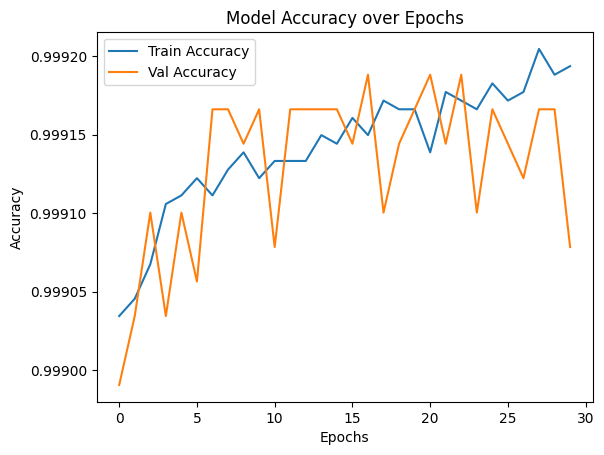

In [46]:
# Plot accuracy
import matplotlib.pyplot as plt # Import pyplot
plt.plot(created_model.history['accuracy'], label='Train Accuracy') # Access history correctly
plt.plot(created_model.history['val_accuracy'], label='Val Accuracy') # Access history correctly
plt.title('Model Accuracy over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [49]:
loss, accuracy, roc_auc, pr_auc, precision, recall = model.evaluate(X_test, y_test)
print(f"\nTest Accuracy: {accuracy:.4f}")

1781/1781 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9991 - loss: 0.0044 - pr_auc: 0.6652 - precision: 0.8512 - recall: 0.5195 - roc_auc: 0.9027

Test Accuracy: 0.9991


1781/1781 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step

Confusion Matrix:
[[56856     8]
 [   44    54]]


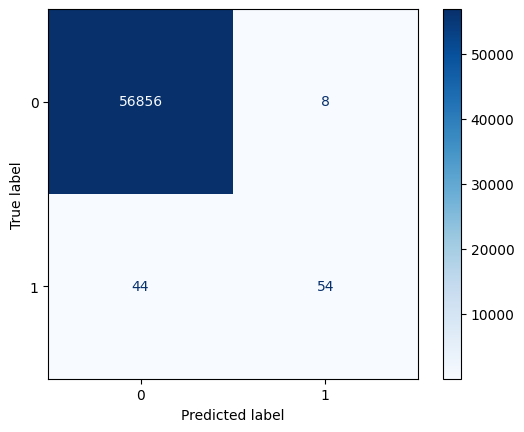

In [50]:
# Predict
y_pred = (model.predict(X_test)>0.5 ).astype("int32")
#Any probability score greater than 0.5 is evaluated as True.
#For normal binary classification the set threshold is 0.5

# Show metrics
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

display_cm = ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred),display_labels=y.unique())

display_cm.plot(cmap='Blues')

In [53]:
new_sample=[[
135,-2.31,1.95,-1.61,2.45,-1.12,0.85,-2.18,0.91,-1.73,2.19,-1.82,1.64,-0.27,-3.01,-0.94,-2.46,-4.12,-1.58,0.63,0.79,0.18,-0.12,0.25,-0.49,0.11,-0.07,0.42,0.21,1250.75
]]

#Processing new Sample

In [54]:
new_samples_scale = scaler.transform(new_sample)

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


In [55]:
#Predict we use prediction label as additonal is cauz we use sigmoid so above 0.5 shows true or lower false and the int32 converts the boolean to int
prediction = model.predict(new_samples_scale)
prediction_label = (prediction > 0.5).astype("int32")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


In [56]:
#Interpret the results


if prediction_label[0][0] == 1:
  print("Prediction : Fraud")
else:
  print("Prediction : Not Fraud")

Prediction : Not Fraud
